# CSIC 5011 Final Project

### NGUYEN Huu Canh - 20818623
### SHIHUA Mingzhi - 20

In this project, we will study the latent spaces of different learning methods, including RPCA, VAE and BiGAN. We use the MNIST Fashion dataset. First, let's explore this dataset.

## 1. MNIST Fashion Dataset

In [12]:
import numpy as np
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.FashionMNIST(root="./", train=True, transform=transform, download=True)
X = dataset.data.reshape(dataset.data.shape[0], -1).numpy().astype(np.float64)
y = dataset.targets.numpy()

In [13]:
image, label = dataset[0]
print(f"Size of an image: {image.shape}")

Size of an image: torch.Size([1, 28, 28])


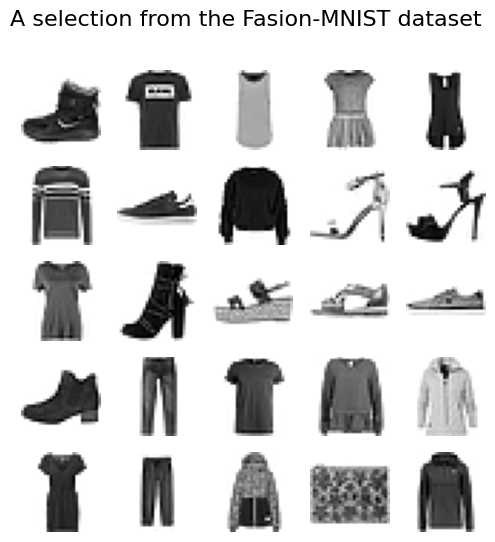

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((28, 28)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the Fasion-MNIST dataset", fontsize=16)

In [15]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

palette = [
    "#FF0000",   # red
    "#00FF00",   # green
    "#0000FF",   # blue
    "#FFFF00",   # yellow
    "#00FFFF",   # cyan
    "#FF00FF",   # magenta
    "#800000",   # maroon
    "#008000",   # dark green
    "#000080",   # navy
    "#808080",   # gray
]

legends = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_embedding(X, y, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in range(10):
        ax.scatter(
            *X[y == digit].T,
            label=legends[digit],
            s=30,
            color=palette[digit],
            alpha=0.425,
            zorder=2,
        )

    ax.set_title(title)
    ax.axis("off")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    

In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

n_neighbors = 30
embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "MDS embedding": MDS(
        n_components=2, n_init=1, max_iter=120, n_jobs=2, normalized_stress="auto"
    ),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [17]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()[:2000]
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X[:2000]
    labels = y[:2000]
    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, labels)
    timing[name] = time() - start_time


Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


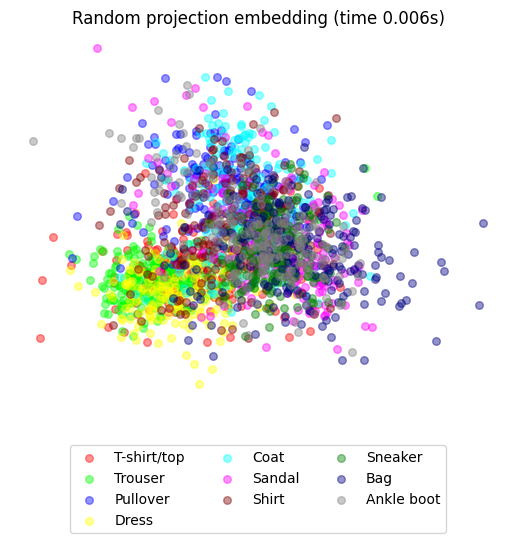

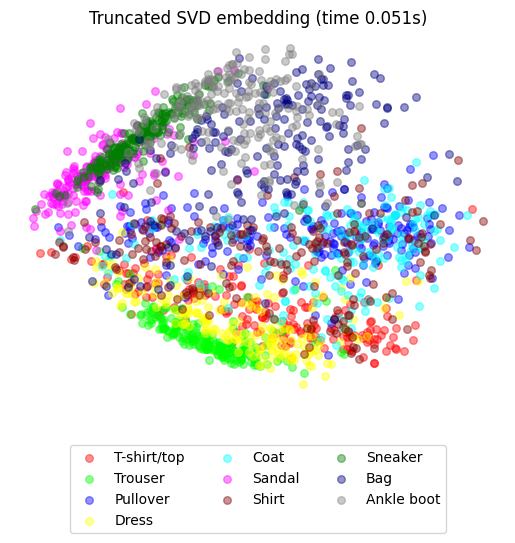

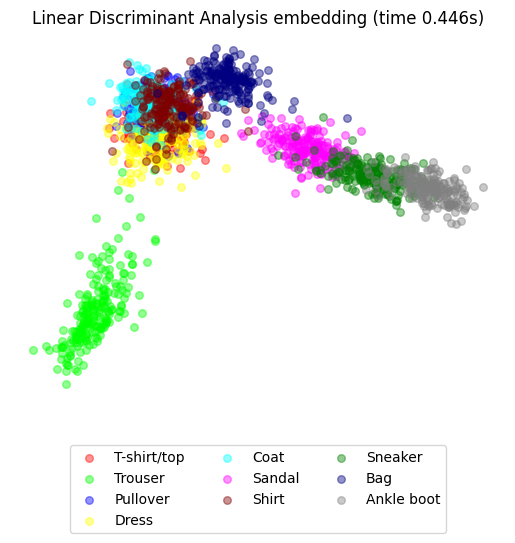

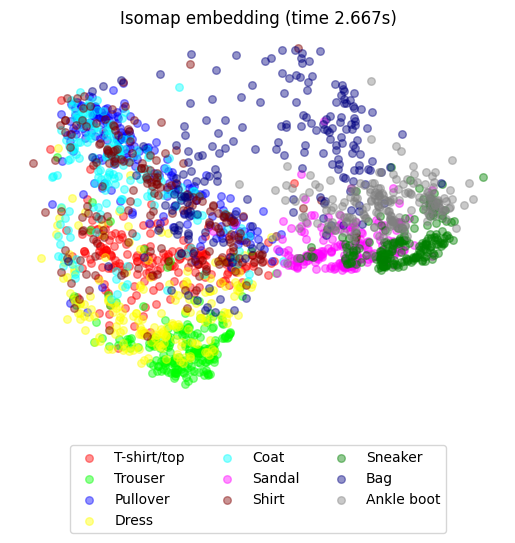

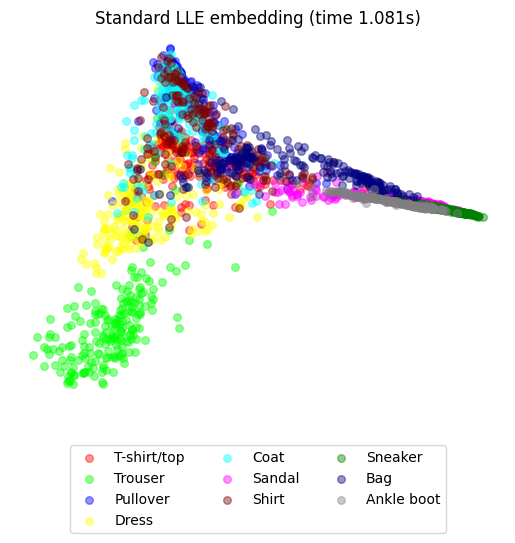

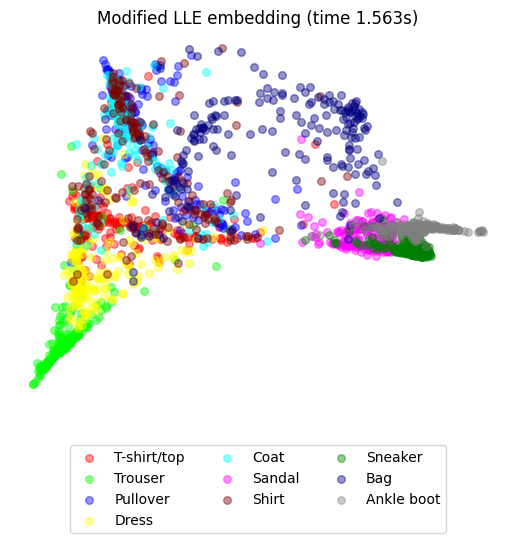

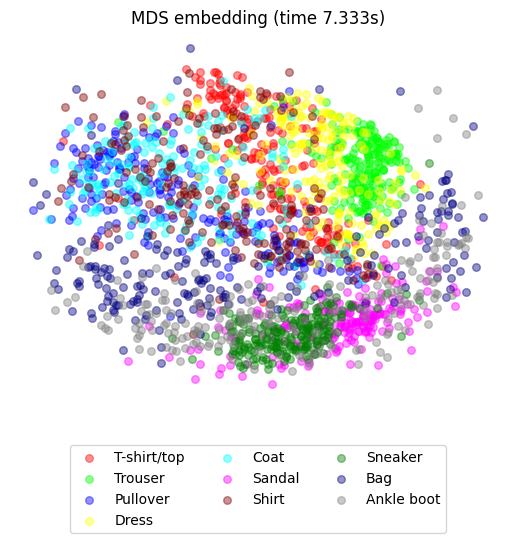

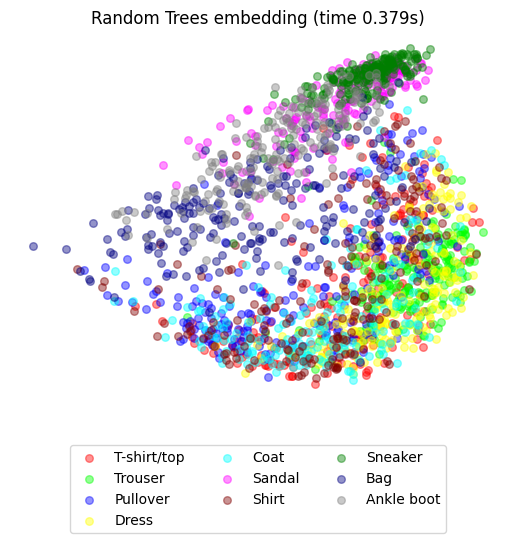

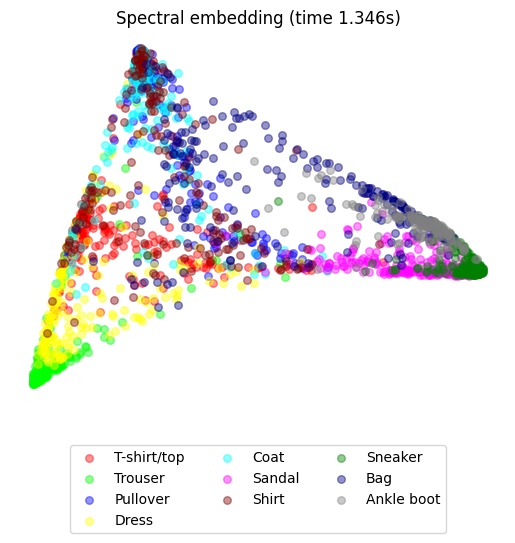

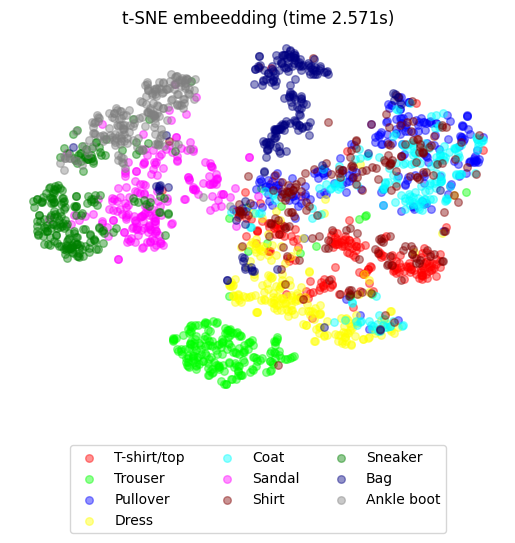

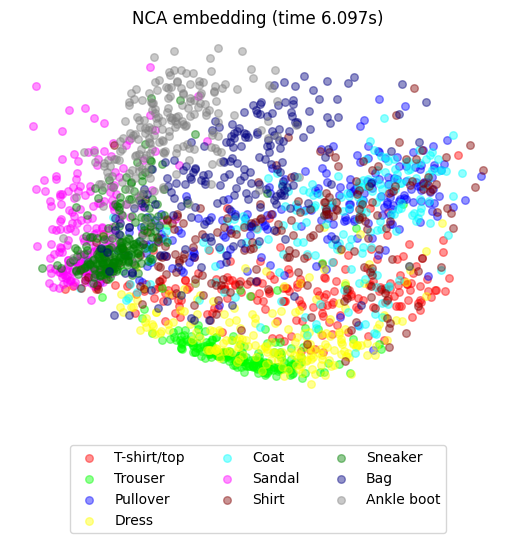

In [18]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], labels, title)

plt.show()

## 2. RPCA

In [20]:
from rpca import rpca
L, S, r = rpca(X, max_iter=100, verbose=True)
print(f"Rank: {r}")

Iteration    0: Primal Error = 839.114288 	Dual Error =   0.003872
Iteration    1: Primal Error =   1.346558 	Dual Error =   0.006203
Iteration    2: Primal Error =   0.377776 	Dual Error =   0.000029
Iteration    3: Primal Error =   0.328686 	Dual Error =   0.000001
Iteration    4: Primal Error =   0.289594 	Dual Error =   0.000002
Iteration    5: Primal Error =   0.189999 	Dual Error =   0.000007
Iteration    6: Primal Error =   0.128925 	Dual Error =   0.000009
Iteration    7: Primal Error =   0.076782 	Dual Error =   0.000010
Iteration    8: Primal Error =   0.046387 	Dual Error =   0.000012
Iteration    9: Primal Error =   0.028656 	Dual Error =   0.000010
Iteration   10: Primal Error =   0.017449 	Dual Error =   0.000010
Iteration   11: Primal Error =   0.010270 	Dual Error =   0.000011
Iteration   12: Primal Error =   0.006259 	Dual Error =   0.000010
Iteration   13: Primal Error =   0.003796 	Dual Error =   0.000009
Iteration   14: Primal Error =   0.002218 	Dual Error =   0.00

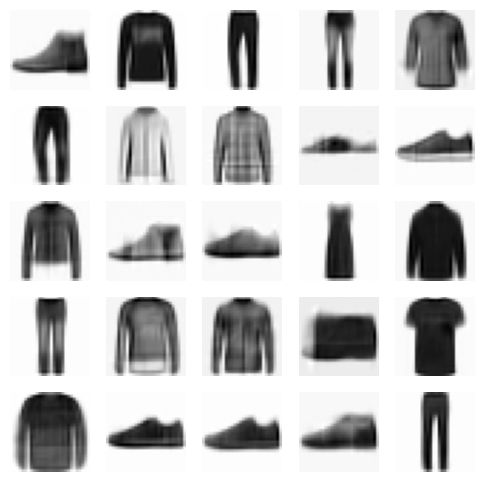

In [21]:
# Low rank
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(L[idx].reshape((28, 28)), cmap=plt.cm.binary)
    ax.axis("off")

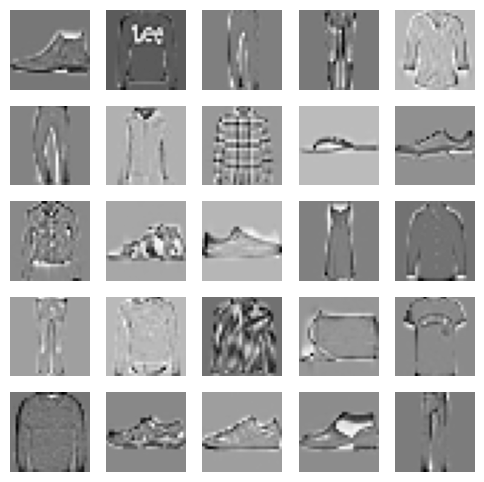

In [22]:
# Spare components
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(S[idx].reshape((28, 28)), cmap=plt.cm.binary)
    ax.axis("off")

In [23]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = L.copy()[:2000]
        data.flat[:: L.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = L[:2000]
    labels = y[:2000]
    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, labels)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


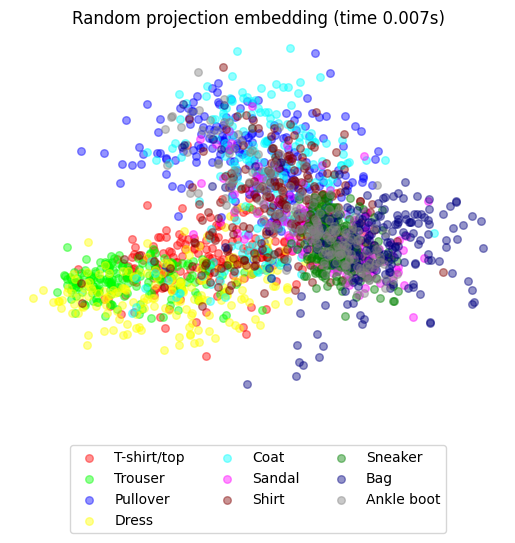

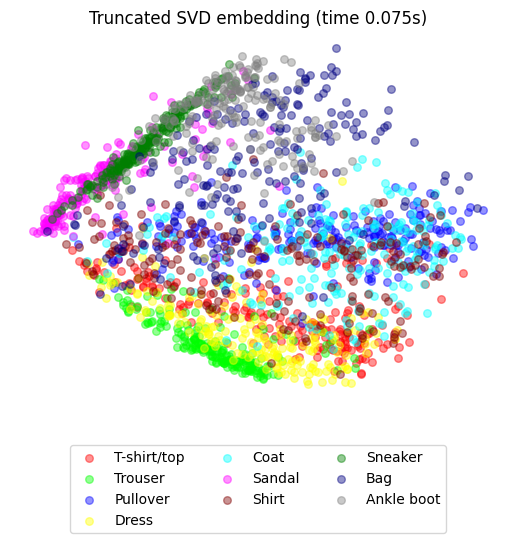

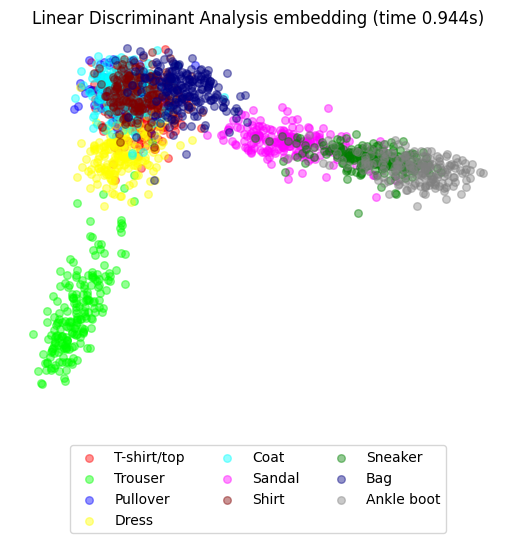

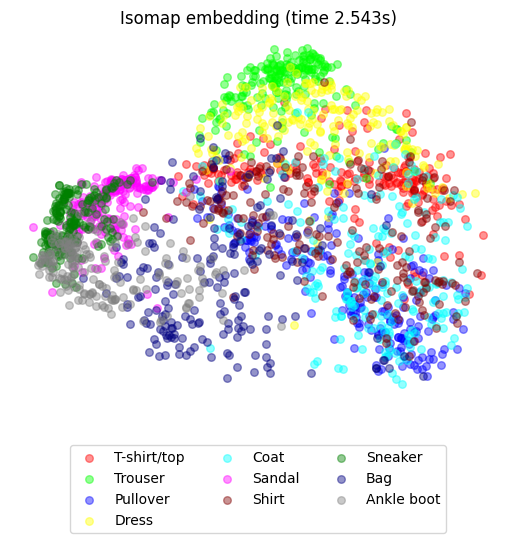

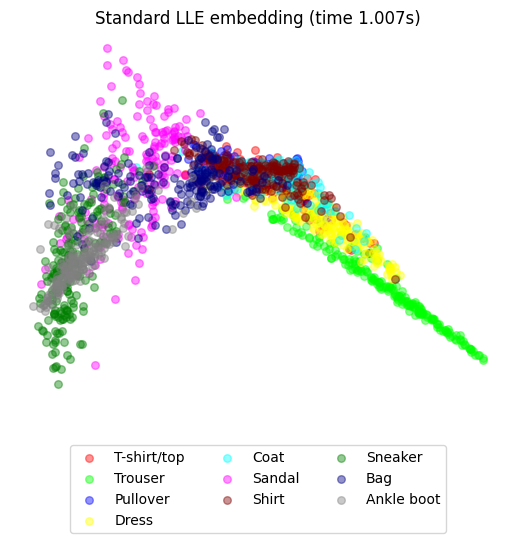

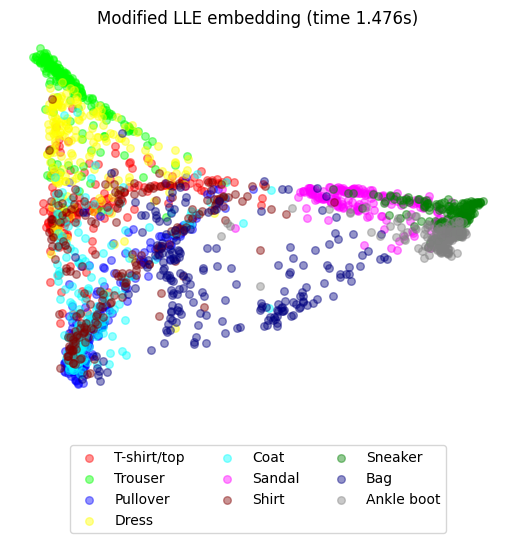

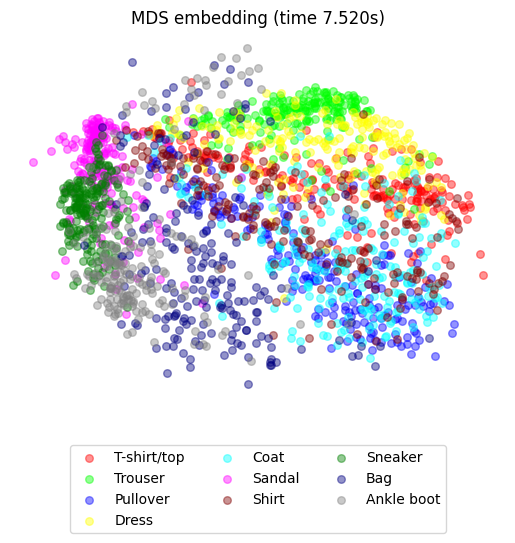

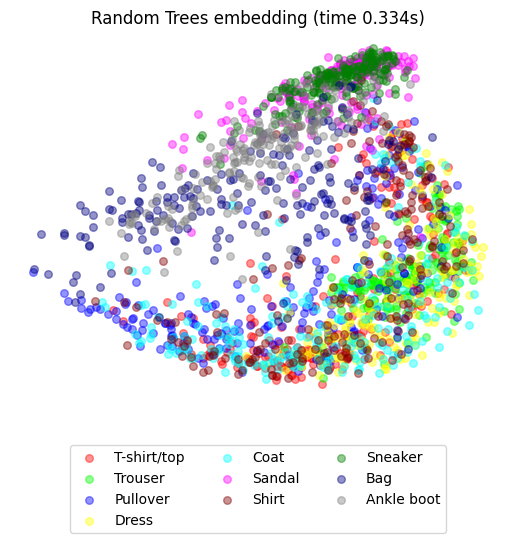

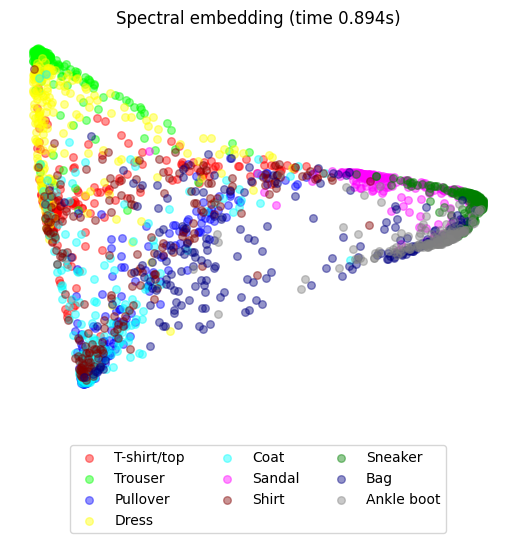

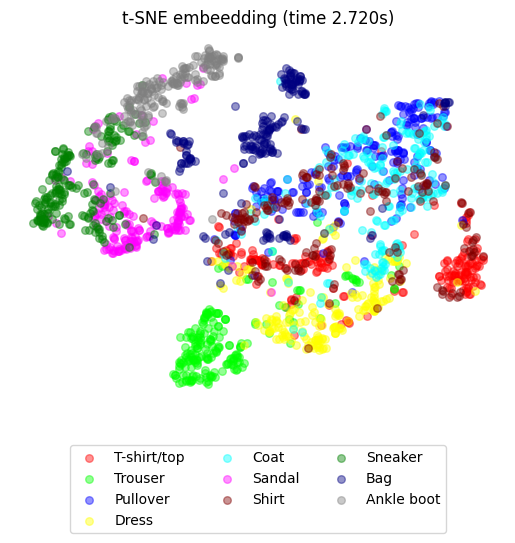

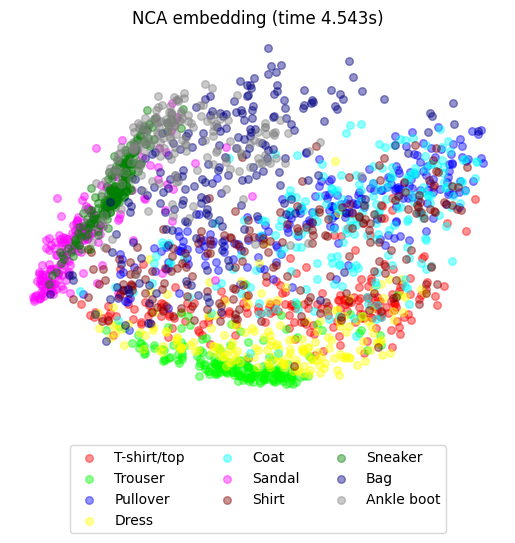

In [24]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], labels, title)

plt.show()

## 3. VAE

Uncomment the following code to train the VAE model. Remember to change latent-space dimensions.

In [ ]:
# !python train_vae.py

In [1]:
import torch
from train_vae import VAE

vae = VAE(432)
model_path = "/home/chris/workspace/CSIC/LatentGAN/models/vae_432.pt"
checkpoint = torch.load(model_path)
for name, params in vae.named_parameters():
    params.data.copy_(checkpoint[name])

vae.eval()

VAE(
  (enc1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (enc2): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (enc3): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (enc4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (fc_mu): Linear(in_features=128, out_features=432, bias=True)
  (fc_log_var): Linear(in_features=128, out_features=432, bias=True)
  (fc2): Linear(in_features=432, out_features=512, bias=True)
  (dec1): ConvTranspose2d(512, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (dec2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (dec3): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
  (dec4): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(3, 3))
)

In [2]:
from torchvision import datasets, transforms, utils

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.FashionMNIST(root="./", train=True, transform=transform, download=True)
X = dataset.data[0:2000]
X = torch.unsqueeze(X, 1).float()
y = dataset.targets.numpy()[0:2000]

# Encode the input image to its latent representation
with torch.no_grad():
    _, latent_vector, _ = vae(X)

# Convert the latent vector to a numpy array and print its shape
X_new = latent_vector.numpy().squeeze()

In [5]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X_new.copy()[:2000]
        data.flat[:: X_new.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X_new[:2000]
    labels = y[:2000]
    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, labels)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


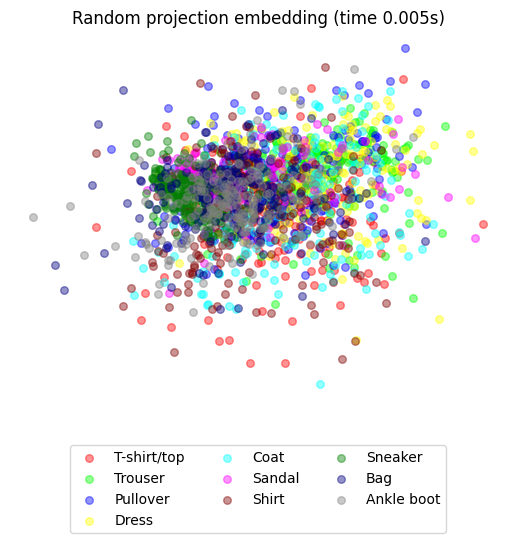

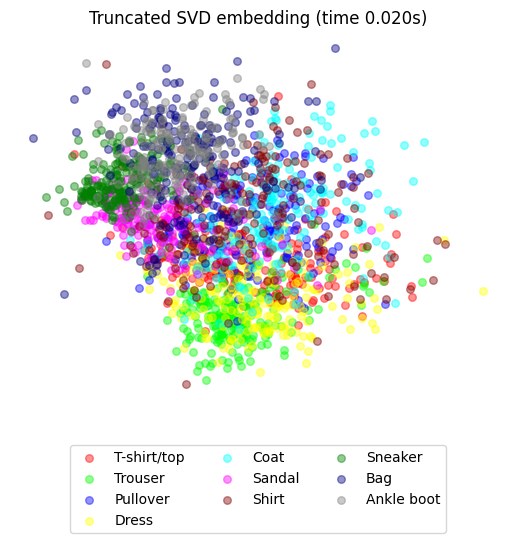

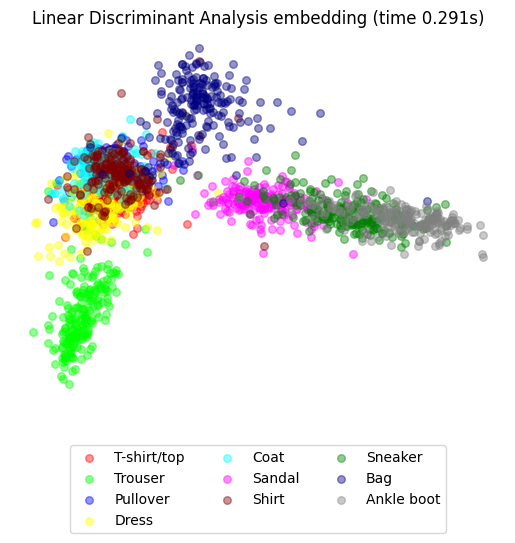

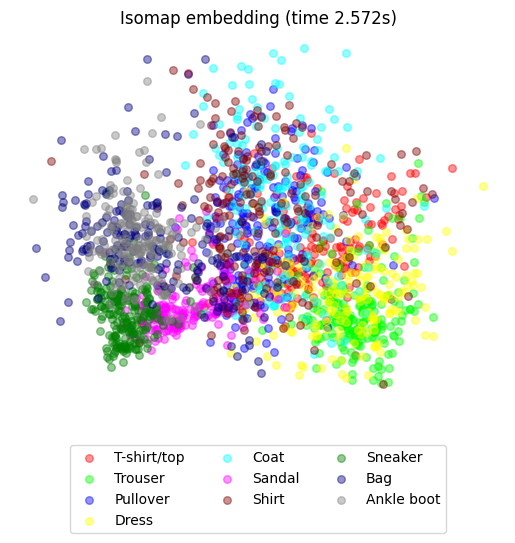

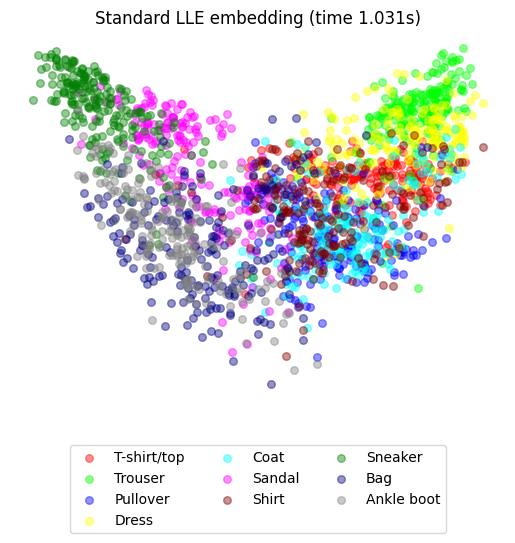

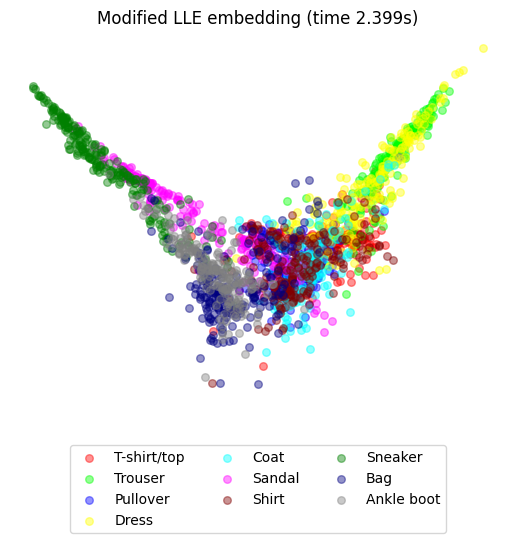

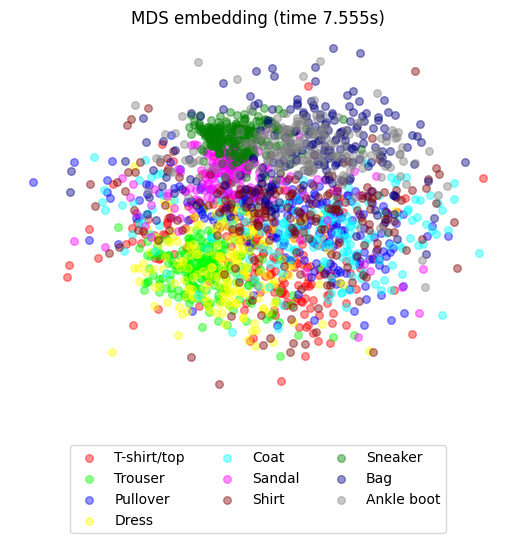

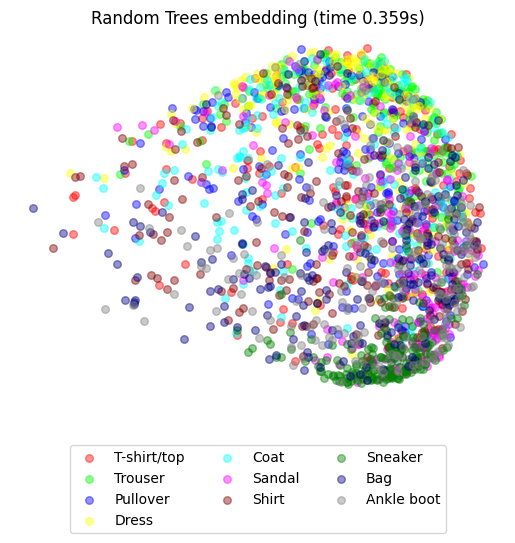

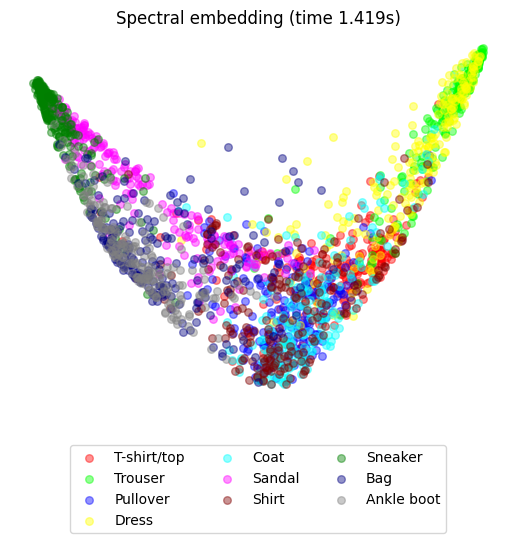

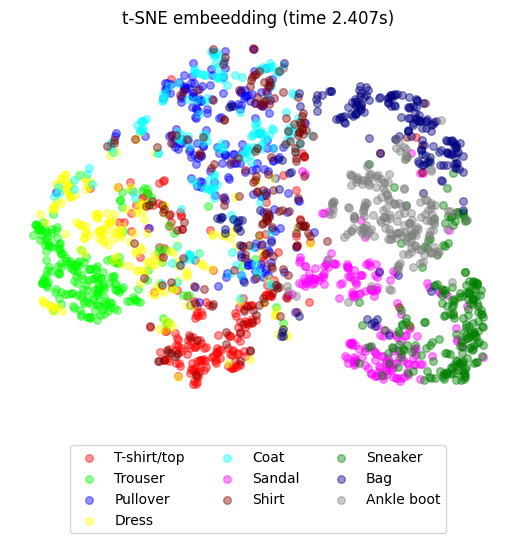

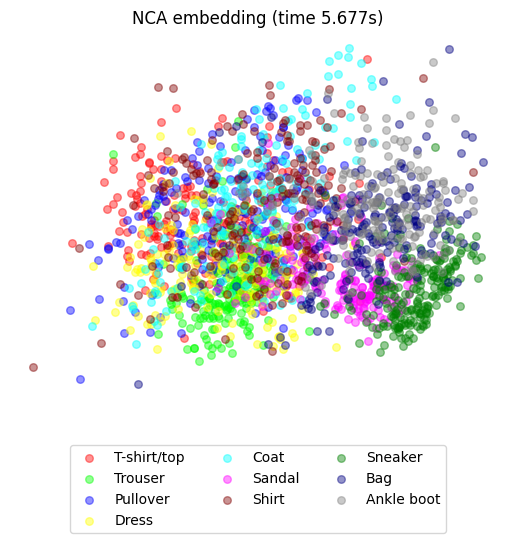

In [9]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], labels, title)

plt.show()

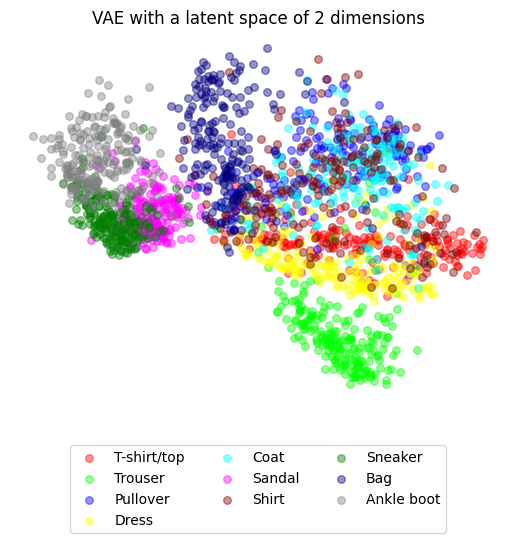

In [8]:
import torch
from train_vae import VAE

vae = VAE(2)
model_path = "/home/chris/workspace/CSIC/LatentGAN/models/vae_2.pt"
checkpoint = torch.load(model_path)
for name, params in vae.named_parameters():
    params.data.copy_(checkpoint[name])

vae.eval()

# Encode the input image to its latent representation
with torch.no_grad():
    _, latent_vector, _ = vae(X)

# Convert the latent vector to a numpy array and print its shape
X_new = latent_vector.numpy().squeeze()

title = f"VAE with a latent space of 2 dimensions"
plot_embedding(X_new, y, title)

plt.show()

In [10]:
from torchvision.utils import save_image

Z1_RANGE = 2
Z2_RANGE = 2
Z1_INTERVAL = .2
Z2_INTERVAL = .2

z1 = torch.arange(-Z1_RANGE, Z1_RANGE, Z1_INTERVAL)
z2 = torch.arange(-Z2_RANGE, Z2_RANGE, Z2_INTERVAL)
num_z1 = z1.shape[0]
num_z2 = z2.shape[0]
num_z = num_z1 * num_z2

sample = torch.zeros(num_z, 2)

for i in range(num_z1):
    for j in range(num_z2):
        idx = i * num_z2 + j
        sample[idx][0] = z1[i]
        sample[idx][1] = z2[j]

sample = vae.decode(sample).cpu().view(num_z, 1, 28, 28)
save_image(sample, 'results/vae_plot_along_z1_and_z2_axis.png', nrow=num_z1)

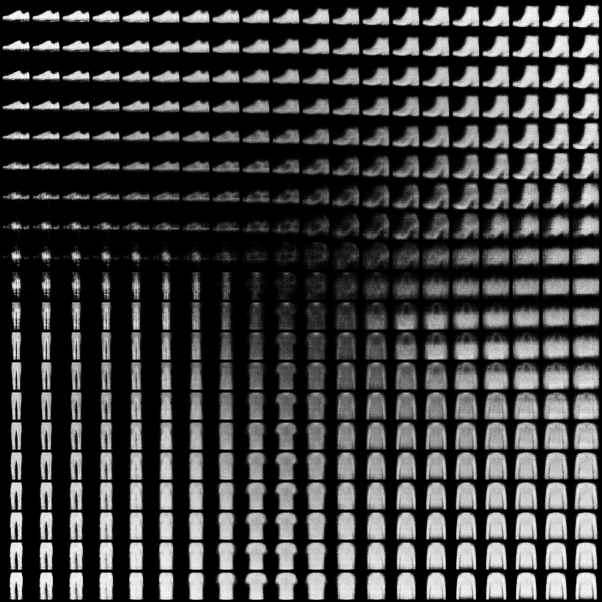

In [11]:
from IPython import display
display.Image("results/vae_plot_along_z1_and_z2_axis.png")

## 4. Bi-directional GAN (Adversarially learned inference with Wasserstein critic)

Uncomment the following code to train the Bi-GAN model. Remember to change latent-space dimensions.

Note that the training process takes around 2 hours to complete. Thus we recommend you to run the code for modification purposes only, not for the complete training. 

In [ ]:
# !python train_bigan.py

In [11]:
import torch
from train_bigan import WALI

wali = WALI(432)
model_path = "/home/chris/workspace/CSIC/LatentGAN/models/bigan_432.pt"
checkpoint = torch.load(model_path)
for name, params in wali.named_parameters():
    params.data.copy_(checkpoint[name])

wali.eval()

WALI(
  (E): Sequential(
    (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (10): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(512, 432, kernel_size=(1, 1), stride=(1, 1))
  )
  (G): Sequential(
    (0): ConvTranspose2d(432, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(512, ep

In [2]:
from torchvision import datasets, transforms, utils

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.FashionMNIST(root="./", train=True, transform=transform, download=True)
X = dataset.data[0:2000]
X = torch.unsqueeze(X, 1).float()
y = dataset.targets.numpy()[0:2000]

# Encode the input image to its latent representation
with torch.no_grad():
    latent_vector = wali.E(X)

# Convert the latent vector to a numpy array and print its shape
X_new = latent_vector.numpy().squeeze()

In [13]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X_new.copy()[:2000]
        data.flat[:: X_new.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X_new[:2000]
    labels = y[:2000]
    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, labels)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


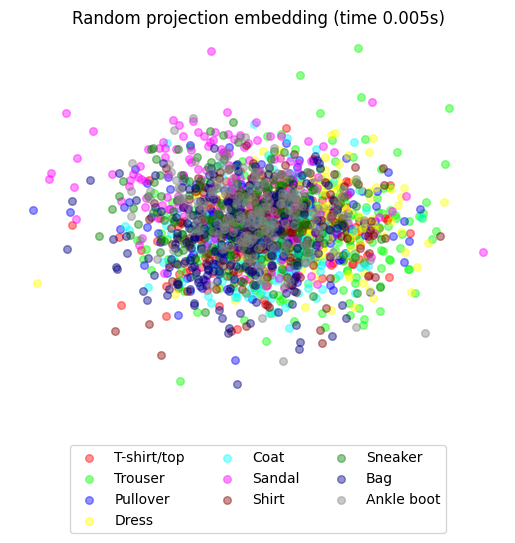

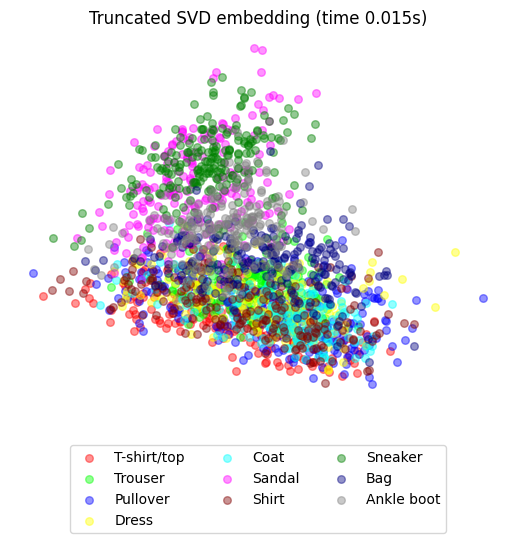

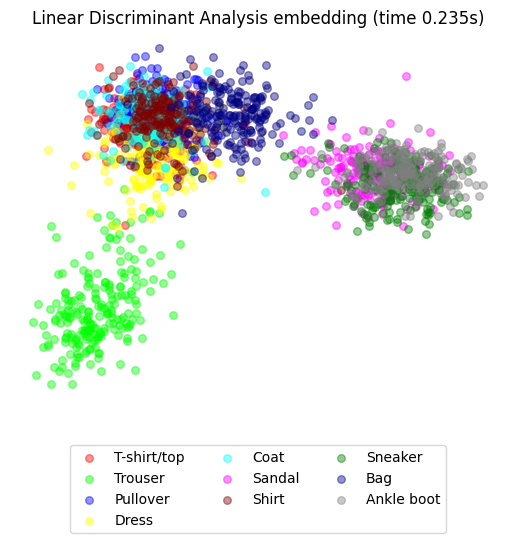

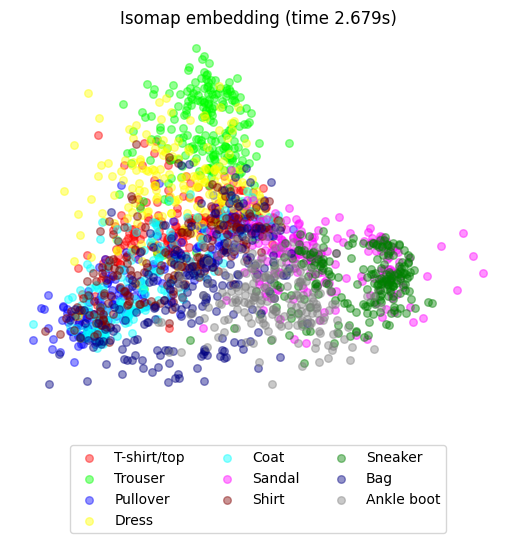

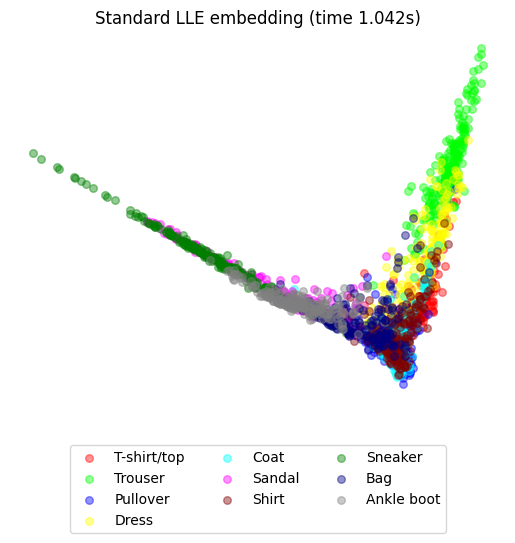

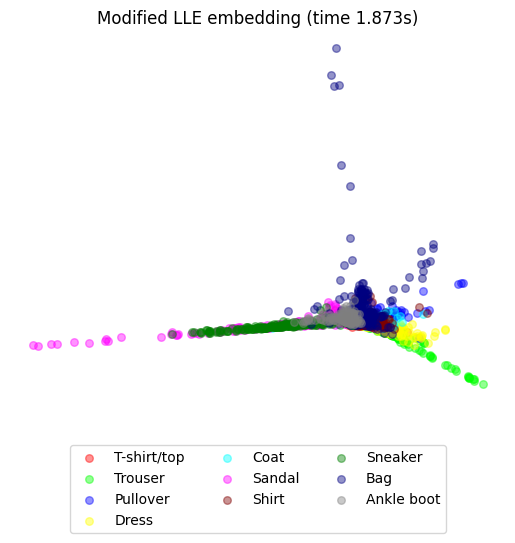

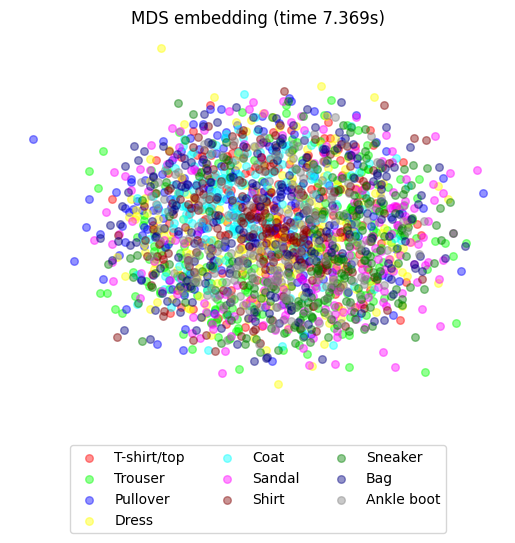

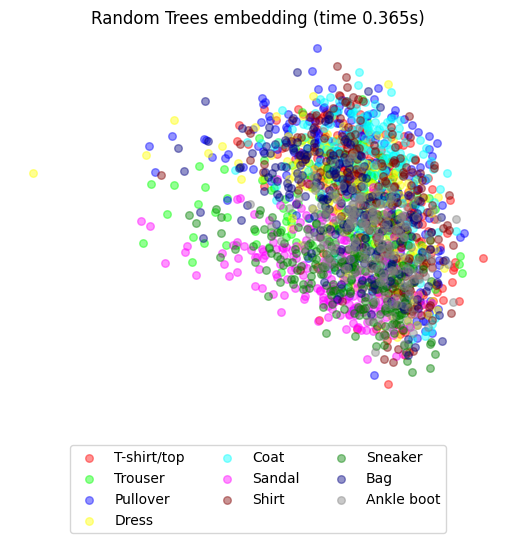

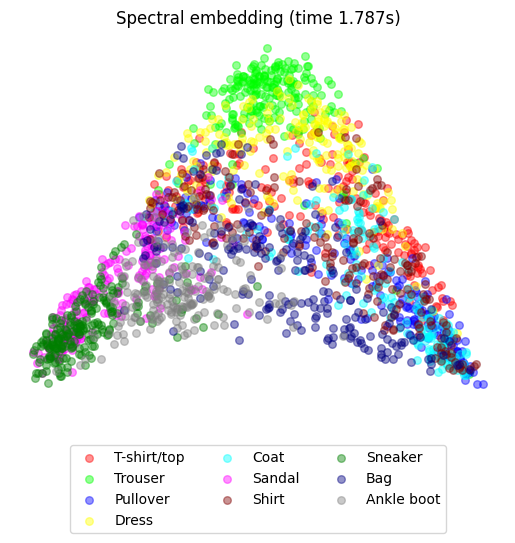

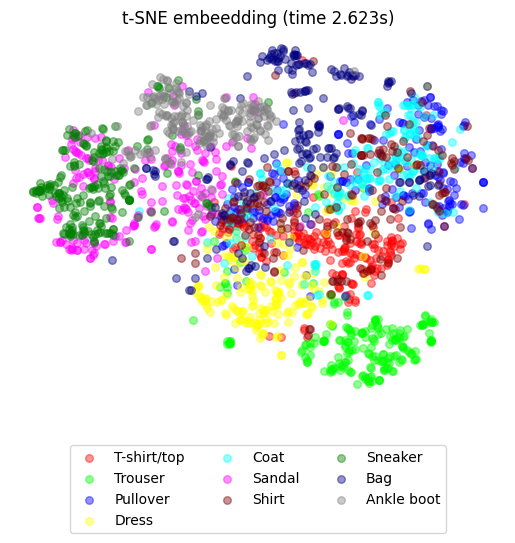

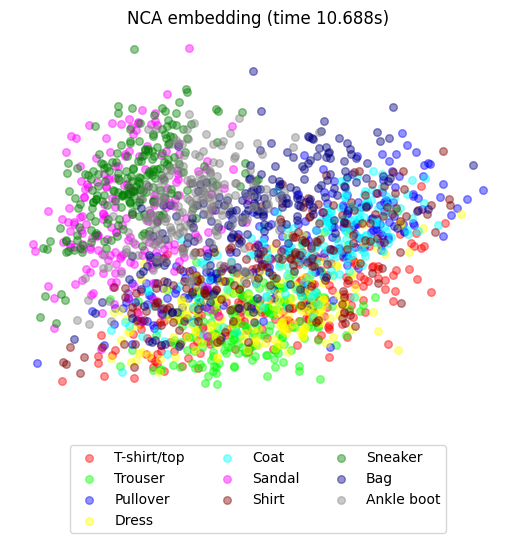

In [14]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], labels, title)

plt.show()

Do the same for other latent space dimensions to see the differences between them.

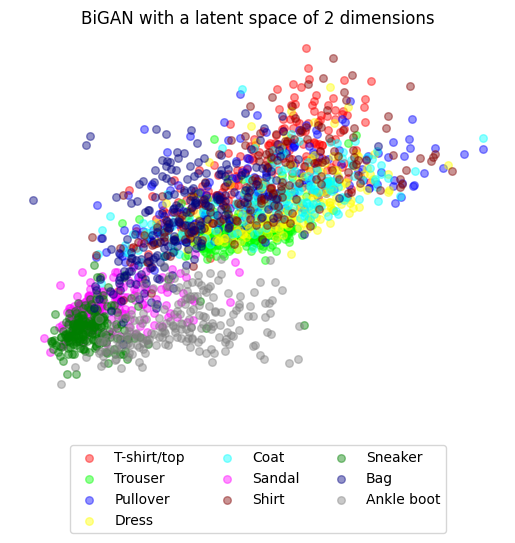

In [6]:
import torch
from train_bigan import WALI

wali = WALI(2)
model_path = "/home/chris/workspace/CSIC/LatentGAN/models/bigan_2.pt"
checkpoint = torch.load(model_path)
for name, params in wali.named_parameters():
    params.data.copy_(checkpoint[name])

wali.eval()

# Encode the input image to its latent representation
with torch.no_grad():
    latent_vector = wali.E(X)

# Convert the latent vector to a numpy array and print its shape
X_new = latent_vector.numpy().squeeze()

title = f"BiGAN with a latent space of 2 dimensions"
plot_embedding(X_new, y, title)

plt.show()